In [30]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

data = np.loadtxt("9.txt", delimiter=",")
print(data, "\n data의 shape: ",data.shape)

[[-4.88313000e+00  6.70716830e+01]
 [-4.83904000e+00  5.56217300e+01]
 [-4.68256000e+00  7.58736570e+01]
 [-4.65282000e+00  5.89596390e+01]
 [-4.61813000e+00  6.21637690e+01]
 [-4.59644000e+00  5.46544640e+01]
 [-4.57476000e+00  6.45114180e+01]
 [-4.34192000e+00  4.33665170e+01]
 [-4.26045000e+00  5.25011000e+01]
 [-4.21216000e+00  3.83683560e+01]
 [-4.07149000e+00  3.41637820e+01]
 [-3.90257000e+00  3.70674130e+01]
 [-3.88739000e+00  2.54569620e+01]
 [-3.74740000e+00  3.43761620e+01]
 [-3.64654000e+00  5.20971820e+01]
 [-3.54483000e+00  3.42038220e+01]
 [-3.43211000e+00  3.36612030e+01]
 [-3.35163000e+00  2.60297800e+01]
 [-3.11538000e+00  3.54206290e+01]
 [-2.98241000e+00  2.63366250e+01]
 [-2.95294000e+00  2.31239820e+01]
 [-2.93960000e+00  1.82744970e+01]
 [-2.88261000e+00  9.87112300e+00]
 [-2.67234000e+00  2.78604920e+01]
 [-2.66293000e+00  2.52801130e+01]
 [-2.59411000e+00  2.81178940e+01]
 [-2.09109000e+00  1.92597930e+01]
 [-2.00866000e+00  2.96409320e+01]
 [-1.88204000e+00  2

# 새 섹션

In [31]:
X = data[:,0]
Y = data[:,1]

print("X:",X)
print("Y:",Y)

X: [-4.88313  -4.83904  -4.68256  -4.65282  -4.61813  -4.59644  -4.57476
 -4.34192  -4.26045  -4.21216  -4.07149  -3.90257  -3.88739  -3.7474
 -3.64654  -3.54483  -3.43211  -3.35163  -3.11538  -2.98241  -2.95294
 -2.9396   -2.88261  -2.67234  -2.66293  -2.59411  -2.09109  -2.00866
 -1.88204  -1.26343  -1.06515  -1.00808  -0.996092 -0.909132 -0.892643
 -0.757375 -0.651066 -0.63338  -0.547559 -0.490987 -0.286812 -0.135687
 -0.110673 -0.025829  0.075851  0.095237  0.140028  0.146876  0.25059
  0.30148   0.388787  0.515222  0.630462  0.650283  0.797051  0.938474
  0.940523  0.987027  0.995039  1.19474   1.79043   1.95272   1.96597
  2.07023   2.192     2.19717   2.37761   2.39745   2.48359   2.56214
  2.60056   2.69505   2.85742   2.9711    3.16253   3.27832   3.29069
  3.41861   3.42249   3.46924   3.53145   3.6786    3.71457   3.73514
  3.82479   3.83463   3.96604   4.0205    4.04953   4.10944   4.19199
  4.20366   4.27748   4.3387    4.42276   4.45022   4.63117   4.82787
  4.84838   4.9

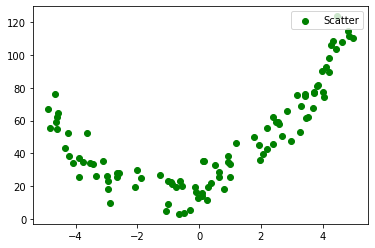

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(X, Y, c='g', label='Scatter')
plt.legend(loc='upper right')

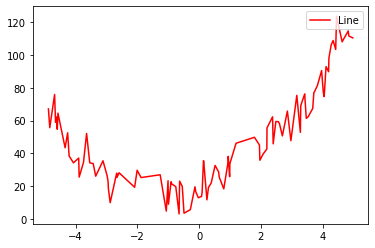

In [33]:
fig = plt.figure()
plt.plot(X, Y, c="r", label='Line')
plt.legend(loc='upper right')

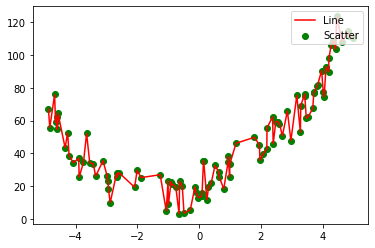

In [34]:
fig = plt.figure()
plt.scatter(X, Y, c='g', label='Scatter')
plt.plot(X, Y, c='r', label='Line')
plt.legend(loc='upper right')

In [35]:
A = tf.Variable(tf.random_normal([1],seed = 2022))
B = tf.Variable(tf.random_normal([1],seed = 2022))
C = tf.Variable(tf.random_normal([1],seed = 2022))

hypothesis = (A*X*X + B*X + C)

In [36]:
cost = tf.reduce_mean(tf.square(hypothesis - Y ))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1E-3)

train = optimizer.minimize(cost)

In [37]:
sess = tf.Session()
    
sess.run(tf.global_variables_initializer())
prev_cost = 10000
for step in range(100001):
  train_val, cost_val, A_val, B_val, C_val = sess.run([train, cost, A, B, C])
  if prev_cost-cost_val <= 0.0000001:
    break

  if step%1000 == 0:
    print("Step:%d, cost:%f, A:%f, B:%f, C:%f"%(step, cost_val, A_val, B_val, C_val))
    prev_cost = cost_val   

Step:0, cost:4026.636475, A:0.817731, B:-0.427345, C:-0.469412
Step:1000, cost:103.667572, A:3.418241, B:5.705585, C:11.088738
Step:2000, cost:77.924675, A:3.103889, B:5.649016, C:16.011341
Step:3000, cost:73.016945, A:2.966634, B:5.624317, C:18.160683
Step:4000, cost:72.081306, A:2.906705, B:5.613531, C:19.099148
Step:5000, cost:71.902924, A:2.880537, B:5.608825, C:19.508924
Step:6000, cost:71.868912, A:2.869111, B:5.606771, C:19.687841
Step:7000, cost:71.862419, A:2.864123, B:5.605875, C:19.765953


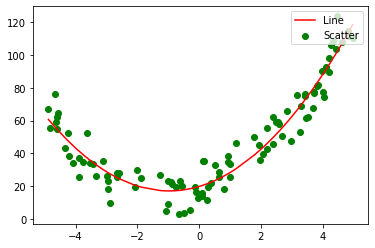

In [38]:
fig = plt.figure()
plt.scatter(X, Y, c='g', label='Scatter')
Y=A_val*X*X+B_val*X+C_val
plt.plot(X, Y, c='r', label='Line')
plt.legend(loc='upper right')